In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'HINDUNILVR.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,62.200001,62.575001,61.805000,61.805000,34.661491,11000
1996-01-02,61.805000,62.700001,61.825001,62.465000,35.031631,203500
1996-01-03,62.465000,62.349998,61.799999,62.095001,34.824135,58000
1996-01-04,62.000000,62.299999,61.900002,62.099998,34.826927,111500
1996-01-05,62.099998,62.400002,61.500000,62.000000,34.770836,39500
...,...,...,...,...,...,...
2024-06-24,2435.000000,2467.850098,2427.050049,2442.199951,2442.199951,1945519
2024-06-25,2439.350098,2446.699951,2427.899902,2432.199951,2432.199951,833789
2024-06-26,2437.000000,2467.000000,2432.399902,2445.600098,2445.600098,1738656


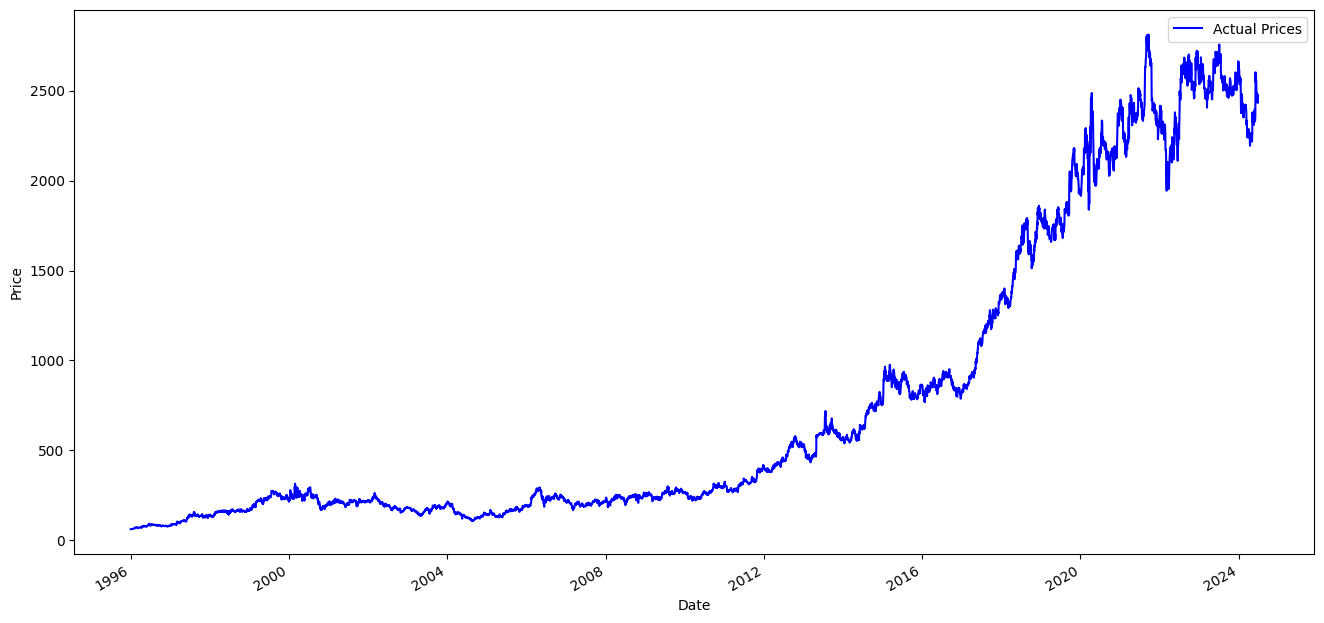

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Close'], color='blue', label='Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [15]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=100)

[array([0.00000000e+00, 2.39943671e-04, 1.05430152e-04, 1.07246909e-04,
       7.08923537e-05, 7.99816860e-05, 1.65415030e-04, 3.27196546e-04,
       2.16313349e-04, 2.29037582e-04, 2.16313349e-04, 3.01746693e-04,
       4.07176845e-04, 4.34443455e-04, 6.81658314e-04, 6.38032570e-04,
       6.70752225e-04, 5.58050884e-04, 5.43508507e-04, 5.43508507e-04])]
[0.0007525506678613611]

[array([0.00000000e+00, 2.39943671e-04, 1.05430152e-04, 1.07246909e-04,
       7.08923537e-05, 7.99816860e-05, 1.65415030e-04, 3.27196546e-04,
       2.16313349e-04, 2.29037582e-04, 2.16313349e-04, 3.01746693e-04,
       4.07176845e-04, 4.34443455e-04, 6.81658314e-04, 6.38032570e-04,
       6.70752225e-04, 5.58050884e-04, 5.43508507e-04, 5.43508507e-04]), array([2.39943671e-04, 1.05430152e-04, 1.07246909e-04, 7.08923537e-05,
       7.99816860e-05, 1.65415030e-04, 3.27196546e-04, 2.16313349e-04,
       2.29037582e-04, 2.16313349e-04, 3.01746693e-04, 4.07176845e-04,
       4.34443455e-04, 6.81658314e-04, 6.38032

In [16]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

212/212 [==============================] - 6s 14ms/step


0.9993559465862213

In [17]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

12/12 [==============================] - 0s 14ms/step


0.9426529191460734

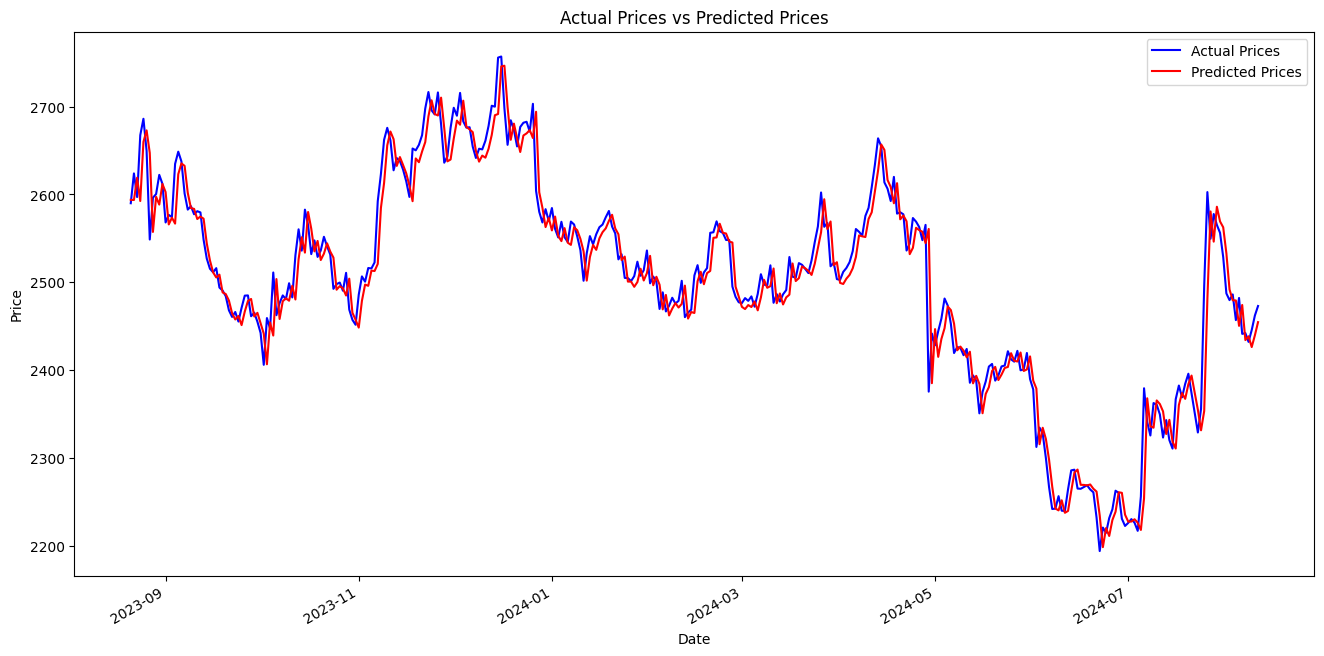

In [18]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [19]:
import joblib


model_file_path = '17.joblib'
scaler_file_path = 'scaler17.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 17.joblib
Scaler saved to scaler17.joblib
